<a href="https://colab.research.google.com/github/SimoneDutto/OS161_FaultMonitor/blob/master/MLAnalysis/FaultDetection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive/')
#!7z x /content/gdrive/My\ Drive/Tesi/faults.zip 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


# Logistic Regression

In [0]:
import pandas as pd
import numpy as np
%cd /content/gdrive/My Drive/Tesi/
df = pd.read_csv('faults_basicmath.csv')
df_test = pd.read_csv('faults_bitcount.csv')
print(df.shape)
print("Fault stat: {}\nNon-fault stat: {}".format(
    (df.fault == 1).sum(),
    (df.fault == 0).sum()
))
print("Fault stat: {}\nNon-fault stat: {}".format(
    (df_test.fault == 1).sum(),
    (df_test.fault == 0).sum()
))

#qsort=0
#basicmath=1
#bitcount=2


/content/gdrive/My Drive/Tesi
(384, 655)
Fault stat: 71
Non-fault stat: 313
Fault stat: 39
Non-fault stat: 49


In [0]:
from sklearn.model_selection import train_test_split

random_state = np.random.RandomState(0)
corr=df.corr()
cor_target = abs(corr["fault"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_index = relevant_features.index.to_list()
#relevant_index
df_rel = df[relevant_index]
df_label = df_rel['fault']
df_rel.drop(columns='fault', axis=1, inplace=True)
#128 relevant feature
X_train, X_test, y_train, y_test = train_test_split(df_rel, df_label, test_size=0.01, random_state=random_state)
print(X_train.shape)
print(X_test)
#print(y_train)

(380, 112)
     host_inst_rate  ...  system.iocache.fast_writes
213          696901  ...                       11984
124          693707  ...                       11984
190          605948  ...                       11984
52           691881  ...                       11984

[4 rows x 112 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
relevant_features = cor_target[cor_target>0.8*max(cor_target)]
relevant_index = relevant_features.index.to_list()
print(relevant_index)
df_relrel = df[relevant_index]
df_label = df_relrel['fault']
df_relrel.drop(columns='fault', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_relrel, df_label, test_size=0.3, random_state=random_state)
# another bin
df_tes = df_test[relevant_index]
df_teslabel = df_test['fault']
df_tes.drop(columns='fault', axis=1, inplace=True)
print(df_relrel.shape)
bru, X_tes, bru_l, y_tes = train_test_split(df_tes, df_teslabel, test_size=0.95, random_state=random_state)
X_tes.fillna(X_train.mean(), inplace=True)

Cs = [0.1, 1, 10, 100, 1000]
param_grid = {'C': Cs}
clf_relrel = GridSearchCV( LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
X_train.fillna(X_train.mean(), inplace=True)
transformer.fit_transform(X_train)
clf_relrel.fit(X_train, y_train)
X_test.fillna(X_train.mean(), inplace=True)
print("Best model on training set has %r with accuracy %.4f" %(clf_relrel.best_params_, clf_relrel.best_score_))
#y_true, y1_pred = y_test, clf_relrel.predict(X_test)
#print(classification_report(y_true, y1_pred))

transformer.transform(X_test)
yte_true, yte_pred = y_tes, clf_relrel.predict(X_tes)
print(classification_report(yte_true, yte_pred))

['host_op_rate', 'host_tick_rate', 'host_seconds', 'sim_insts', 'sim_ops', 'system.membus.trans_dist::UpgradeReq', 'system.membus.trans_dist::UpgradeResp', 'system.cpu.committedInsts', 'system.cpu.committedOps', 'system.cpu.num_int_alu_accesses', 'system.cpu.num_int_insts', 'system.cpu.num_int_register_writes', 'system.cpu.num_idle_cycles', 'system.cpu.num_busy_cycles', 'system.cpu.not_idle_fraction', 'system.cpu.idle_fraction', 'system.cpu.op_class::total', 'system.cpu.dcache.SoftPFReq_misses::cpu.data', 'system.cpu.dcache.SoftPFReq_misses::total', 'fault']
(384, 19)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best model on training set has {'C': 0.1} with accuracy 0.9849
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        45
           1       1.00      0.10      0.19        39

    accuracy                           0.58        84
   macro avg       0.78      0.55      0.45        84
weighted avg       0.77      0.58      0.47        84



[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import  GridSearchCV


Cs = [0.1, 1, 10, 100, 1000]
param_grid = {'C': Cs}

clf = GridSearchCV( LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
#X_train.fillna(X_train.mean(), inplace=True)
clf.fit(X_train, y_train)
#X_test.fillna(X_train.mean(), inplace=True)
print("Best model on training set has %r with accuracy %.4f" %(clf.best_params_, clf.best_score_))
y_true, y1_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y1_pred))
y_true, y1_pred = yt_train, clf.predict(Xt_train)
print(classification_report(y_true, y1_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        38
           1       0.00      0.00      0.00        32

    accuracy                           0.54        70
   macro avg       0.27      0.50      0.35        70
weighted avg       0.29      0.54      0.38        70



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Dataset Preparation
##Domain Adaptation
###Ideas
- domain shift
- trasfer learning (maybe train just first layer)
- outlier detection
- papers

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler


EPOCHS = 50

LEARNING_RATE = 0.001
device="cuda"

%cd /content/gdrive/My Drive/Tesi/

def pre_dataset(database_name):
  df = pd.read_csv(database_name)
  df = df.dropna(axis=0, how='any', thresh=20)
  df = df.dropna(axis=1, how='all')
  return df

def data_label(df, index):
  df_f = df.loc[:,index]
  df_label = df.loc[:,'fault']
  df_f = df_f.drop(columns='fault', axis=1)
  return df_f,df_label

def transform_data(X, y, mean, transf):
  X = X.fillna(mean)
  Xb, yb = np.array(X), np.array(y)
  Xb = transf.transform(Xb)
  return Xb, yb

df_math = pre_dataset("10kmath.csv")
df_bitcount = pre_dataset('10kbit.csv')
df_bitcount0 = pre_dataset('5kbit0.csv')
df_qsort = pre_dataset('10ksort.csv')
df_search = pre_dataset('10ksearch.csv')
#df_bitcount = pd.concat([df_bitcount, df_bitcount0])
df_total = pd.concat([df_math, df_bitcount, df_qsort, df_search])
#df_search = pre_dataset("search_small.csv")
if True:
  corr=df_math.corr()
  cor_target = abs(corr["fault"])
  cor_target.sort_values(ascending=False, inplace=True)
  relevant_features = cor_target[0:20]
  relevant_index = relevant_features.index.to_list()
  print(relevant_index)

  corr=df_bitcount.corr()
  cor_target = abs(corr["fault"])
  cor_target.sort_values(ascending=False, inplace=True)
  relevant_features = cor_target[0:20]
  relevant_index1 = relevant_features.index.to_list()
  print(relevant_index1)

  corr=df_qsort.corr()
  cor_target = abs(corr["fault"])
  cor_target.sort_values(ascending=False, inplace=True)
  relevant_features = cor_target[0:20]
  relevant_index2 = relevant_features.index.to_list()
  print(relevant_index2)

index = np.unique(relevant_index)
#index = list(set(df_math.columns)&set(df_qsort.columns)&set(df_bitcount)&set(df_search))
print("Merge lenght: "+str(len(index)))

df_m, df_mlabel = data_label(df_math, index)
df_b, df_blabel = data_label(df_bitcount, index)
#df_qnf, df_qnflabel = data_label(df_qsort[df_qsort['fault']==0], index)
df_q, df_qlabel = data_label(df_qsort, index)
df_s, df_slabel = data_label(df_search, index)
df_tt, df_ttlabel = data_label(df_total, index)

/content/gdrive/My Drive/Tesi
['fault', 'system.membus.trans_dist::UpgradeReq', 'system.membus.trans_dist::UpgradeResp', 'system.mem_ctrls.bytes_written::writebacks', 'system.membus.trans_dist::Writeback', 'system.cpu.dcache.writebacks::total', 'system.cpu.dcache.writebacks::writebacks', 'system.mem_ctrls.num_writes::writebacks', 'system.mem_ctrls.bw_total::writebacks', 'system.mem_ctrls.bw_write::writebacks', 'system.cpu.itb_walker_cache.tags.replacements', 'system.cpu.itb_walker_cache.tags.sampled_refs', 'system.cpu.icache.tags.replacements', 'system.membus.pkt_count_system.cpu.icache.mem_side::total', 'system.cpu.icache.ReadReq_misses::cpu.inst', 'system.cpu.icache.ReadReq_misses::total', 'system.cpu.icache.demand_misses::cpu.inst', 'system.membus.pkt_count_system.cpu.icache.mem_side::system.mem_ctrls.port', 'system.cpu.icache.overall_misses::cpu.inst', 'system.membus.pkt_size_system.cpu.icache.mem_side::system.mem_ctrls.port']
['fault', 'system.cpu.num_fp_register_writes', 'system.

In [0]:
transformer_mtrain = StandardScaler()
transformer_btrain = StandardScaler()
transformer_tttrain = StandardScaler()
# Train - Test
Xm_trainval, Xm_test, ym_trainval, ym_test = train_test_split(df_m, df_mlabel, test_size=0.5, stratify=df_mlabel, random_state=69)
Xm_train, Xm_val, ym_train, ym_val = train_test_split(Xm_trainval, ym_trainval, test_size=0.3, stratify=ym_trainval, random_state=21)

# Xm_trainval.fillna(Xm_trainval.mean(), inplace=True) 
 
# print(Xm_train.head(5))

# transformer_mtrain.transform(Xm_train)
Xm_train = Xm_train.fillna(Xm_train.mean())
transformer_mtrain.fit(Xm_train)
mean_m = Xm_train.mean()

Xm_train, ym_train = transform_data(Xm_train, ym_train, mean_m, transformer_mtrain)
Xm_test, ym_test = transform_data(Xm_test, ym_test, mean_m, transformer_mtrain)
Xm_trainval, ym_trainval = transform_data(Xm_trainval, ym_trainval, mean_m, transformer_mtrain)
Xm_val, ym_val = transform_data(Xm_val, ym_val, mean_m, transformer_mtrain)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(df_b, df_blabel, stratify=df_blabel, test_size=0.2, random_state=69)
Xb_train.fillna(Xb_train.mean(), inplace=True)
transformer_btrain.fit(Xb_train)
mean_b=Xb_train.mean()
Xb_train, yb_train = transform_data(Xb_train,yb_train, mean_b, transformer_btrain)
Xb_test, yb_test =transform_data(Xb_test, yb_test, mean_b, transformer_btrain)

Xq_train, Xq_test, yq_train, yq_test = train_test_split(df_q, df_qlabel,stratify=df_qlabel, test_size=0.2, random_state=69)
# Xq_train.fillna(Xq_train.mean(), inplace=True)
# transformer.fit(Xq_train)
# mean=Xq_train.mean()

Xq_train, yq_train = transform_data(Xq_train,yq_train, mean_m, transformer_mtrain)
Xq_test, yq_test =transform_data(Xq_test, yq_test, mean_m, transformer_mtrain)

# Xqnf_train, _, yqnf_train, _ = train_test_split(df_qnf, df_qnflabel, test_size=0.05, random_state=420)
# Xqnf_train.fillna(Xqnf_train.mean(), inplace=True)
# transformer.fit(Xqnf_train)
# mean=Xqnf_train.mean()
# Xqnf_train, yqnf_train = transform_data(Xqnf_train, yqnf_train, mean, transformer)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(df_s, df_slabel,stratify=df_slabel, test_size=0.2, random_state=69)
# transformer.fit(Xm_train)
# mean=Xm_train.mean()
Xs_train, ys_train = transform_data(Xs_train,ys_train,mean_m, transformer_mtrain)
Xs_test, ys_test =transform_data(Xs_test, ys_test, mean_m, transformer_mtrain)

Xtt_trainval, Xtt_test, ytt_trainval, ytt_test = train_test_split(df_tt, df_ttlabel, test_size=0.5, stratify=df_ttlabel, random_state=69)
Xtt_train, Xtt_val, ytt_train, ytt_val = train_test_split(Xtt_trainval, ytt_trainval, test_size=0.3, stratify=ytt_trainval, random_state=21)
transformer_tttrain.fit(Xtt_train)
mean_tt = Xtt_train.mean()
Xtt_train, ytt_train = transform_data(Xtt_train, ytt_train, mean_tt, transformer_tttrain)
Xtt_test, ytt_test = transform_data(Xtt_test, ytt_test, mean_tt, transformer_tttrain)
Xtt_trainval, ytt_trainval = transform_data(Xtt_trainval, ytt_trainval, mean_tt, transformer_tttrain)
Xtt_val, ytt_val = transform_data(Xtt_val, ytt_val, mean_tt, transformer_tttrain)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
BATCH_SIZE = 32
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

train_dataset = ClassifierDataset(torch.from_numpy(Xm_train).float(), torch.from_numpy(ym_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(Xm_val).float(), torch.from_numpy(ym_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(Xm_test).float(), torch.from_numpy(ym_test).long())

ttrain_dataset = ClassifierDataset(torch.from_numpy(Xb_train).float(), torch.from_numpy(yb_train).long())
ttest_dataset = ClassifierDataset(torch.from_numpy(Xb_test).float(), torch.from_numpy(yb_test).long())

strain_dataset = ClassifierDataset(torch.from_numpy(Xs_train).float(), torch.from_numpy(ys_train).long())
stest_dataset = ClassifierDataset(torch.from_numpy(Xs_test).float(), torch.from_numpy(ys_test).long())

tttrain_dataset = ClassifierDataset(torch.from_numpy(Xtt_train).float(), torch.from_numpy(ytt_train).long())
ttval_dataset = ClassifierDataset(torch.from_numpy(Xtt_val).float(), torch.from_numpy(ytt_val).long())
tttest_dataset = ClassifierDataset(torch.from_numpy(Xtt_test).float(), torch.from_numpy(ytt_test).long())

#qtrainnf_dataset = ClassifierDataset(torch.from_numpy(Xqnf_train).float(), torch.from_numpy(yqnf_train).long())
qtrain_dataset = ClassifierDataset(torch.from_numpy(Xq_train).float(), torch.from_numpy(yq_train).long())
qtest_dataset = ClassifierDataset(torch.from_numpy(Xq_test).float(), torch.from_numpy(yq_test).long())


train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

ttrain_loader = DataLoader(dataset=ttrain_dataset, batch_size=BATCH_SIZE, drop_last=True)
ttest_loader = DataLoader(dataset=ttest_dataset, batch_size=1)

qtrain_loader = DataLoader(dataset=qtrain_dataset, batch_size=BATCH_SIZE, drop_last=True)
qtest_loader = DataLoader(dataset=qtest_dataset, batch_size=1)

#qtrainnf_loader = DataLoader(dataset=qtrainnf_dataset, batch_size=BATCH_SIZE, drop_last=True)

strain_loader = DataLoader(dataset=strain_dataset, batch_size=BATCH_SIZE, drop_last=True)
stest_loader = DataLoader(dataset=stest_dataset, batch_size=1)

tttrain_loader = DataLoader(dataset=tttrain_dataset, batch_size=BATCH_SIZE, drop_last=True)
ttval_loader = DataLoader(dataset=ttval_dataset, batch_size=1)
tttest_loader = DataLoader(dataset=tttest_dataset, batch_size=1)

# Simple Net

In [0]:
import torch.nn.functional as F
import torch.nn.init
import copy

class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()

        self.features = nn.Sequential(
              nn.Linear(len(index)-1, 32),
              nn.BatchNorm1d(32),
              nn.Dropout(0.5), #50 % probability 
              nn.LeakyReLU(),
              torch.nn.Linear(32, 64),
              nn.BatchNorm1d(64),
              torch.nn.Dropout(0.2), #20% probability
              torch.nn.LeakyReLU(),
              torch.nn.Linear(64, 22),
              nn.BatchNorm1d(22),
              torch.nn.LeakyReLU())
        self.classifier = torch.nn.Linear(22, 2)
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


class BinaryClassificationSimple(nn.Module):
    def __init__(self):
        super(BinaryClassificationSimple, self).__init__()
        
        self.layer_1 = nn.Linear(19, 32) # Number of input features is 12.
        #self.layer_2 = nn.Linear(32, 32)
        #self.layer_3 = nn.Linear(64,32)
        self.layer_out = nn.Linear(32, 2) 
        
        self.lrelu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm = nn.BatchNorm1d(32)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm(x)
        x = self.lrelu(x)
        x = self.layer_out(x)
        return x

def binary_acc(y_pred, y_test):
  y_pred_tag = torch.log_softmax(y_pred, dim = 1)
  _, y_pred_tags = torch.max(y_pred_tag, dim = 1)

  correct_results_sum = (y_pred_tags == y_test).sum().float()

  acc = correct_results_sum/y_test.shape[0]
  acc = torch.round(acc * 100)

  return acc    


In [0]:
LEARNING_RATE = 0.001
STEP_SIZE = 15
GAMMA = 0.1
# model = BinaryClassificationSimple(
model = BinaryClassification()
#model = DANN(False, True)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

In [0]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}
print("Begin training.")
acc_max = 0
for e in tqdm(range(1, 50+1)):
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()

    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = binary_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
    scheduler.step()    
    # VALIDATION
    with torch.no_grad():
        model.eval()
        val_epoch_loss = 0
        val_epoch_acc = 0
        running_corrects = 0
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = binary_acc(y_val_pred, y_val_batch)
            _, preds = torch.max(y_val_pred.data, 1)

            # Update Corrects
            running_corrects += torch.sum(preds == y_val_batch.data).data.item()
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
        val = running_corrects/len(val_loader)
    if(val >= acc_max):
      acc_max = val
      best_model = copy.deepcopy(model)
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
print("Best model accuracy: "+str(acc_max))

torch.save(best_model.state_dict(), "/content/gdrive/My Drive/Tesi/model_NN50_20.pth")

Begin training.


Epoch 001: | Train Loss: 0.46276 | Val Loss: 0.35348 | Train Acc: 86.952| Val Acc: 92.123
Epoch 002: | Train Loss: 0.32402 | Val Loss: 0.27996 | Train Acc: 92.714| Val Acc: 92.123
Epoch 003: | Train Loss: 0.26955 | Val Loss: 0.25186 | Train Acc: 92.929| Val Acc: 92.466
Epoch 004: | Train Loss: 0.25734 | Val Loss: 0.25002 | Train Acc: 92.405| Val Acc: 92.123
Epoch 005: | Train Loss: 0.24618 | Val Loss: 0.24495 | Train Acc: 93.095| Val Acc: 92.637
Epoch 006: | Train Loss: 0.24210 | Val Loss: 0.25067 | Train Acc: 93.095| Val Acc: 92.637
Epoch 007: | Train Loss: 0.24676 | Val Loss: 0.25471 | Train Acc: 92.762| Val Acc: 92.123
Epoch 008: | Train Loss: 0.25298 | Val Loss: 0.25547 | Train Acc: 92.619| Val Acc: 92.123
Epoch 009: | Train Loss: 0.23871 | Val Loss: 0.24771 | Train Acc: 92.976| Val Acc: 92.637
Epoch 010: | Train Loss: 0.23940 | Val Loss: 0.24898 | Train Acc: 93.333| Val Acc: 92.637
Epoch 011: | Train Loss: 0.23766 | Val Loss: 0.24810 | Train Acc: 93.238| Val Acc: 92.637
Epoch 012:

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

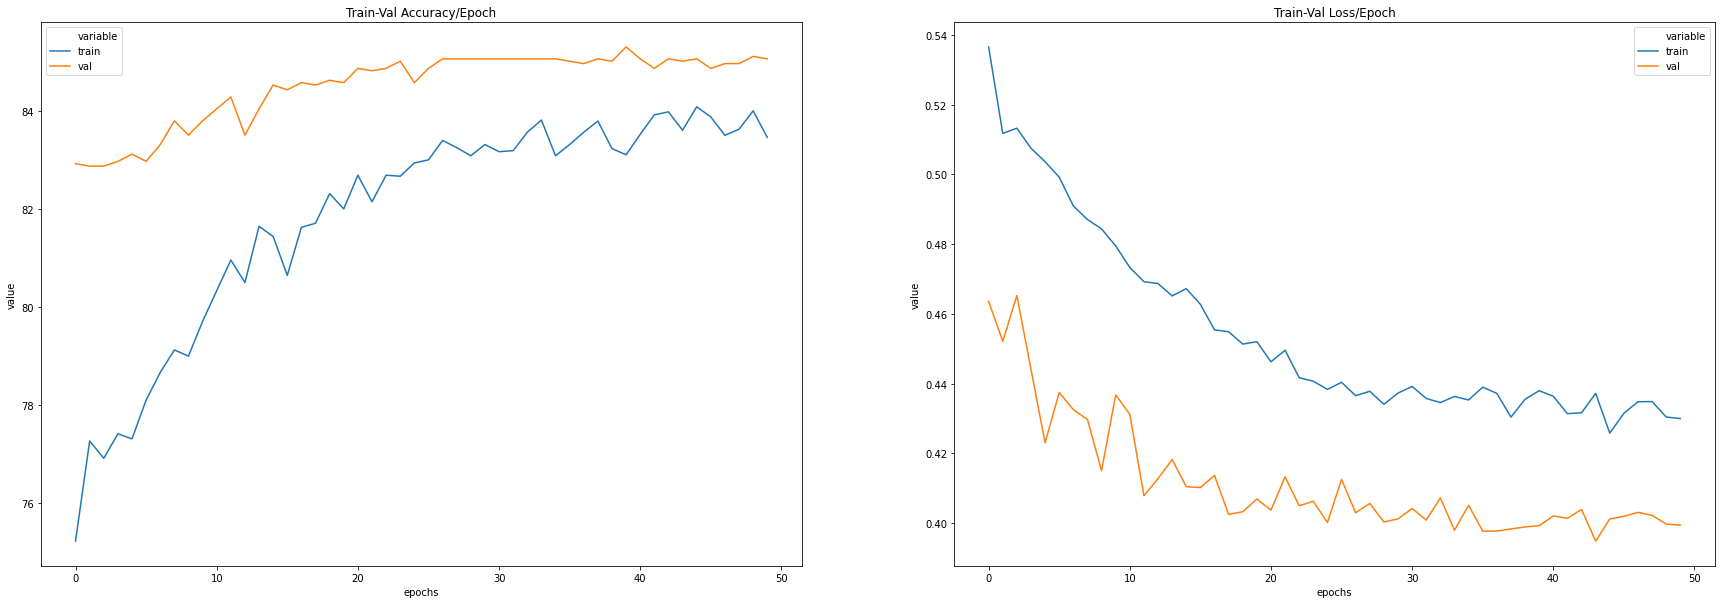

In [0]:
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [0]:
y_pred_list = []
model=best_model
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(classification_report(ym_test, y_pred_list, target_names=["NoFault", "Fault"]))

              precision    recall  f1-score   support

     NoFault       0.91      1.00      0.95      1326
       Fault       1.00      0.80      0.89       621

    accuracy                           0.93      1947
   macro avg       0.96      0.90      0.92      1947
weighted avg       0.94      0.93      0.93      1947



# Transfer Learning

In [0]:
model = DANN(False, False)
best_model = DANN(True, False)
#Transfer learning seems to work quite well, but of corse it needs tweaks
model.features[8].weight.requires_grad = False
model.features[8].bias.requires_grad = False
model.classifier.weight.requires_grad = False
model.classifier.bias.requires_grad = False
LEARNING_RATE = 0.001
# model.layer_out.weight.requires_grad = False
# model.layer_out.bias.requires_grad = False
model =  copy.deepcopy(best_model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.features.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

#loaders = [test_loader, train_loader, ym_test]
#loaders = [qtest_loader, qtrain_loader, yq_test]
#loaders = [ttest_loader, ttrain_loader, yb_test]
loaders = [stest_loader, strain_loader, ys_test]

te_loader = loaders[0]
tr_loader = loaders[1]
ye_test = loaders[2]

#print(model)
model.to(device)
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in te_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(classification_report(ye_test, y_pred_list, target_names=["NoFault", "Fault"]))

model.train()

for e in tqdm(range(1, 10+1)):
  train_epoch_loss = 0
  train_epoch_acc = 0
  for X_train_batch, y_train_batch in tr_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
      optimizer.zero_grad()
      
      y_train_pred = model(X_train_batch)
      
      train_loss = criterion(y_train_pred, y_train_batch)
      train_acc = binary_acc(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      
      train_epoch_loss += train_loss.item()
      train_epoch_acc += train_acc.item()
  scheduler.step()
  print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(tr_loader):.5f}| Train Acc: {train_epoch_acc/len(tr_loader):.3f}')

y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in te_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(classification_report(ye_test, y_pred_list, target_names=["NoFault", "Fault"]))

              precision    recall  f1-score   support

     NoFault       0.00      0.00      0.00       334
       Fault       0.46      1.00      0.63       283

    accuracy                           0.46       617
   macro avg       0.23      0.50      0.31       617
weighted avg       0.21      0.46      0.29       617



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 001: | Train Loss: 1.06128| Train Acc: 60.818
Epoch 002: | Train Loss: 0.79139| Train Acc: 58.312
Epoch 003: | Train Loss: 0.69431| Train Acc: 58.494
Epoch 004: | Train Loss: 0.66646| Train Acc: 61.558
Epoch 005: | Train Loss: 0.65858| Train Acc: 62.662
Epoch 006: | Train Loss: 0.65913| Train Acc: 62.623
Epoch 007: | Train Loss: 0.65851| Train Acc: 62.740
Epoch 008: | Train Loss: 0.65408| Train Acc: 63.286
Epoch 009: | Train Loss: 0.65252| Train Acc: 63.260
Epoch 010: | Train Loss: 0.65076| Train Acc: 63.351

              precision    recall  f1-score   support

     NoFault       0.63      0.94      0.75       334
       Fault       0.83      0.34      0.48       283

    accuracy                           0.66       617
   macro avg       0.73      0.64      0.62       617
weighted avg       0.72      0.66      0.63       617



#Fallimenti/Prove

In [0]:
from sklearn.svm import OneClassSVM

GAMMA=0.0001

df_total = df[relevant_index]
df_normal = df_total[df_total['fault']==0]
df_fault = df_total[df_total['fault']==1]

df_normal.drop(columns='fault', axis=1, inplace=True)
df_fault.drop(columns='fault', axis=1, inplace=True)

outlier_prop = len(df_fault) / len(df_normal)
svm = OneClassSVM(kernel='linear', nu=outlier_prop) 
svm.fit(df_normal)
y_pred_out = svm.predict(df_fault) 
y_pred_nor = svm.predict(df_normal)
y_out = y_pred_out[y_pred_out==-1]
y_nor = y_pred_nor[y_pred_nor==1]

print(""+str(len(y_nor)/len(y_pred_nor))+" accuracy with norm class")
print(""+str(len(y_out)/len(y_pred_out))+" accuracy with fault class")



0.7731629392971247 accuracy with norm class
0.9859154929577465 accuracy with fault class


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

svc = SVC(kernel="linear")
lg = LogisticRegression(C=0.1)
rfecv = RFECV(estimator=lg, step=1, cv=StratifiedKFold(2),
              scoring='precision')
df_tot = pd.concat([df,df_qsorts, df_target])
#df_tot = df_qsort
df_tot.fillna(df_tot.mean(), inplace=True)
transformer.fit_transform(df_tot)
df_la = df_tot['fault']
df.drop(columns='fault', axis=1, inplace=True)
rfecv.fit(df_tot, df_la)

print("Optimal number of features : %d" % rfecv.n_features_)
print(df.columns[rfecv.ranking_[0:20]])
# # Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_[0:20]) + 1), rfecv.grid_scores_[0:20])
plt.show()

In [0]:
cnn1d_1 = nn.Conv1d(1, 10, kernel_size=5)
iter_bitcnt = iter(ttrain_loader)
inputs, labels = next(iter_bitcnt)
inputs = inputs.unsqueeze(1)
#inputs = inputs.transpose(0, 1).transpose(1, 2)
dann = DANN(False, True)
X = dann.features[0](inputs)
print(X.shape)
X = dann.features[2](X)
print(X.shape)
X = dann.features[3](X)
print(X.shape)
X = dann.features[5](X)
print(X.shape)
X = dann.features[6](X)
print(X.shape)
X = dann.features[8](X)
print(X.shape)
X = dann.features[10](X)
print(X.shape)
X = dann.avgpool(X)
print(X.shape)

In [0]:
# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=604).to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# mean-squared error loss
criterion = nn.MSELoss()

iter_bitcnt = iter(ttrain_loader)
inputs, labels = next(iter_bitcnt)
inputs = inputs.unsqueeze(1).to(device)
#inputs = inputs.transpose(0, 1).transpose(1, 2)
dann = AE(input_shape=604).to(device)
X = dann.encoder[0](inputs)
print(X.shape)
X = dann.encoder[2](X)
print(X.shape)
X = dann.encoder[3](X)
print(X.shape)
X = dann.encoder[5](X)
print(X.shape)
X = dann.encoder[6](X)
print(X.shape)
print("------------")
X = dann.decoder[0](X)
print(X.shape)
X = dann.decoder[2](X)
print(X.shape)
X = dann.decoder[3](X)
print(X.shape)
X = dann.decoder[5](X)
print(X.shape)
X = dann.decoder[6](X)
print(X.shape)

# Utility Function

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import numpy as np

def heatmap(datas, row_labels, col_labels,  ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    #print(datas)
    im = ax.imshow(datas)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(datas.shape[1]))
    ax.set_yticks(np.arange(datas.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(row_labels)
    ax.set_yticklabels(col_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(datas.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(datas.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt ="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.
    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

# DANN
Add batch norm layer to CNN

In [0]:
import torch.nn.functional as F
import torch.nn.init
from torch.autograd import Function
import copy

class ReverseLayerF(Function):
    # Forwards identity
    # Sends backward reversed gradients
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha
        return x

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha
        return output, None

class BinaryClassificationDANN(nn.Module):
    def __init__(self):
        super(BinaryClassificationDANN, self).__init__()
        
        self.layer_1 = nn.Linear(len(index)-1, 32) # Number of input features is 19.
        self.layer_clas = nn.Linear(32, 2) 
        
        self.lrelu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm = nn.BatchNorm1d(32)

        self.layer_domain = nn.Linear(32,2)

        self.features = nn.Sequential(
              nn.Linear(len(index)-1, 32),
              nn.BatchNorm1d(32),
              nn.Dropout(0.5), #50 % probability 
              nn.LeakyReLU(),
              torch.nn.Linear(32, 64),
              nn.BatchNorm1d(64),
              torch.nn.Dropout(0.2), #20% probability
              torch.nn.LeakyReLU(),
              torch.nn.Linear(64, 22),
              nn.BatchNorm1d(22),
              torch.nn.LeakyReLU())
        self.classifier = nn.Linear(22, 2)
        self.classifier_domain = nn.Linear(22, 2)
        
    def forward(self, x, alpha=None):
        x = self.features(x)
       
        if alpha is not None:
          x = ReverseLayerF.apply(x, alpha)
          x = self.classifier_domain(x)
        else:
          x = self.classifier(x)
        return x

class DANN_CNN(nn.Module):
    def __init__(self, num_classes=2):
        super(DANN_CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=64, kernel_size=11, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=3, stride=2),
            nn.Conv1d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=3, stride=2),
            nn.Conv1d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv1d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool1d(60)
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 60, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
        self.classifier_domain = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 60, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 2), # classifier between domain source or target
        )

    def forward(self, x, alpha=None):
        x = x.unsqueeze(1)
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        if alpha is not None:
          x = ReverseLayerF.apply(x, alpha)
          x = self.classifier_domain(x)
        else:
          x = self.classifier(x)
        return x


def DANN(pretrain=True, CNN=False):
  if CNN:
    model = DANN_CNN()
    if pretrain:
      model.load_state_dict(torch.load("model_CNN50.pth"), strict=False)
      for i in [1,4]:
        model.classifier_domain[i].weight.data = model.classifier[i].weight.data
        model.classifier_domain[i].bias.data = model.classifier[i].bias.data
  else:
    model = BinaryClassificationDANN()
    if pretrain:
      model.load_state_dict(torch.load("model_NN50_20.pth"), strict=False)
      model.classifier_domain.weight.data = model.classifier.weight.data
      model.classifier_domain.bias.data = model.classifier.bias.data
  return model


In [0]:
LEARNING_RATE = 0.001     # Higher batch sizes allows for larger learning rates. An empirical heuristic suggests that, when changing
DEVICE = device                     # the batch size, learning rate should change by the same factor to have comparable results
            # The initial Learning Rate
MOMENTUM = 0.9       # Hyperparameter for SGD, keep this at 0.9 when using SGD
WEIGHT_DECAY = 5e-5  # Regularization, you can keep this at the default        # Coef for discriminator reverse gradient

NUM_EPOCHS = 30     # Total number of training epochs (iterations over dataset)
STEP_SIZE = 20       # How many epochs before decreasing learning rate (if using a step-down policy)
GAMMA = 0.1          # Multiplicative factor for learning rate step-down

LOG_FREQUENCY = 50

criterion_classifier = nn.CrossEntropyLoss()
criterion_domain = nn.CrossEntropyLoss()

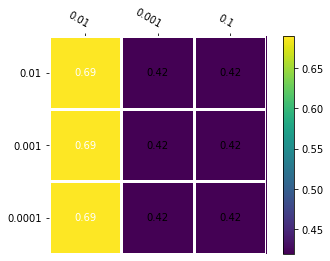

Results on qsort domain(test): 
              precision    recall  f1-score   support

     NoFault       0.88      1.00      0.94       391
       Fault       1.00      0.78      0.87       241

    accuracy                           0.91       632
   macro avg       0.94      0.89      0.90       632
weighted avg       0.92      0.91      0.91       632

Results on qsort domain(test): 
              precision    recall  f1-score   support

     NoFault       0.00      0.00      0.00       334
       Fault       0.46      1.00      0.63       283

    accuracy                           0.46       617
   macro avg       0.23      0.50      0.31       617
weighted avg       0.21      0.46      0.29       617



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results on bitcount domain(target)
              precision    recall  f1-score   support

     NoFault       0.89      1.00      0.94       515
       Fault       1.00      0.69      0.81       200

    accuracy                           0.91       715
   macro avg       0.95      0.84      0.88       715
weighted avg       0.92      0.91      0.91       715

Results on basicmath(source):
              precision    recall  f1-score   support

     NoFault       0.90      1.00      0.95      1326
       Fault       1.00      0.76      0.86       621

    accuracy                           0.92      1947
   macro avg       0.95      0.88      0.91      1947
weighted avg       0.93      0.92      0.92      1947



In [0]:
# Define loss function

loss_c = []
loss_d0 = []
loss_d1 = []
loss_t = []

accuracies = []
accuracy_max=0
best_alpha = 0
best_lr = 0
max_max = 0
best_best = 0
alpha_alpha = 0
lr_lr = 0

#alphas = [0.01]
alphas = [0.01, 0.001, 0.1]
lrs = [0.01, 0.001, 0.0001]
#lrs = [0.0001]

accuracies = np.zeros((len(alphas), len(lrs)))

# It is possible to deativate domain adaptation or validation
da = True
validation = True
nan = False

i=0
#len_dataloader = len(photo_dataset)
for alpha in alphas:
  j=0
  for lr in lrs:
    net = DANN(pretrain=True, CNN=False)
    net = net.to(device)
    parameters_to_optimize = net.parameters()
    optimizer = optim.Adam(parameters_to_optimize, lr=lr, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)
    accuracy_max = 0
    current_step = 0
# Start iterating over the epochs
    for epoch in range(NUM_EPOCHS):
      print('Starting epoch {}/{}, LR = {}, ALPHA = {}'.format(epoch+1, NUM_EPOCHS, scheduler.get_last_lr(), alpha))
      m = 0
      iter_bitcnt = iter(ttrain_loader)
      # Iterate over the dataset
      for inputs, labels in train_loader:
        
        #p = float(m + (epoch+1) * len_dataloader) / (NUM_EPOCHS+1) / len_dataloader
        #alpha = 2. / (1. + np.exp(-10 * p)) - 1
        #if current_step % LOG_FREQUENCY == 0:
         # print("Alpha "+str(alpha)+"\n")
        # Bring data over the device of choice
        inputs = inputs.to(device)
        labels = labels.to(device)

        net.train() # Sets module in training mode

        # PyTorch, by default, accumulates gradients after each backward pass
        # We need to manually set the gradients to zero before starting a new iteration
        optimizer.zero_grad() # Zero-ing the gradients

        # Forward pass to the network
        outputs = net(inputs, alpha=None)
        # Compute loss based on output and ground truth
        loss_classifier = criterion_classifier(outputs, labels)
        if not da:
          loss_classifier.backward()
          optimizer.step()
          current_step += 1
          m += 1
        else:
          loss_classifier.backward(retain_graph=True)
        # Log loss
        
        # if torch.isnan(loss_classifier):
        #   nan = True
        #   break

        if not da:
          continue
        # Compute gradients for each layer and update weights
        domain_labels = torch.zeros(BATCH_SIZE)
        domain_labels = domain_labels.long().to(DEVICE)

        outputs_domain = net(inputs, alpha=alpha)

        # Compute loss based on output and ground truth
        loss_discriminator0 = criterion_domain(outputs_domain, domain_labels)
        loss_discriminator0.backward(retain_graph=True)
        # Log loss
        

        # Forward pass to the discriminator class label 1
        try:
           inputs, labels = next(iter_bitcnt)
        except StopIteration:
          iter_bitcnt = iter(ttrain_loader)
          inputs, labels = next(iter_bitcnt)

        inputs = inputs.to(device)
        labels = labels.to(device)

        domain_labels = torch.ones(BATCH_SIZE)
        domain_labels = domain_labels.long().to(device)

        outputs_dom = net(inputs, alpha=alpha)
        loss_discriminator1 = criterion_domain(outputs_dom, domain_labels)
        loss_discriminator1.backward()

        # if current_step % LOG_FREQUENCY == 0:
        #   loss_t.append(loss_tot)
        #   print('Step {}, Total Loss {}'.format(current_step, loss_tot.item()))
        

        optimizer.step() # update weights based on accumulated gradients

        current_step += 1
        m += 1
      
      if nan:
        break
      scheduler.step()

      # loss_c.append(loss_classifier.item())
      # print('Epoch {}, Loss Net {}'.format(epoch, loss_classifier.item()))

      # loss_d0.append(loss_discriminator0.item())
      # print('Epoch {}, Loss Discriminator Class Label0 {}'.format(epoch, loss_discriminator0.item()))
      
      # loss_d1.append(loss_discriminator1.item())
      # print('Step {}, Loss Discriminator Class Label1 {}'.format(epoch, loss_discriminator1.item()))

      net.train(False) # Set Network to evaluation mode

      running_corrects = 0

      for images, labels in tqdm(qtest_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward Pass
        outputs = net(images)
        # Get predictions
        _, preds = torch.max(outputs.data, 1)

        # Update Corrects
        running_corrects += torch.sum(preds == labels.data).data.item()

        # Calculate Accuracy

      for images, labels in tqdm(stest_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward Pass
        outputs = net(images)

        # Get predictions
        _, preds = torch.max(outputs.data, 1)

        # Update Corrects
        running_corrects += torch.sum(preds == labels.data).data.item()

        # Calculate Accuracy
        
      accuracy_val = running_corrects / float(len(qtest_dataset)+len(stest_dataset))

      #print('\nValidation Accuracy on Qsort+Search(val): {}\n'.format(accuracy_val))
      running_corrects = 0

      for images, labels in tqdm(val_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward Pass
        outputs = net(images)

        # Get predictions
        _, preds = torch.max(outputs.data, 1)

        # Update Corrects
        running_corrects += torch.sum(preds == labels.data).data.item()

        # Calculate Accuracy
        
      accuracy_bro = running_corrects / float(len(val_dataset))

      #print('\nValidation Accuracy on Basic Math(source): {}\n'.format(accuracy_bro))
      
      running_corrects = 0

      for images, labels in tqdm(ttest_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward Pass
        outputs = net(images)

        # Get predictions
        _, preds = torch.max(outputs.data, 1)

        # Update Corrects
        running_corrects += torch.sum(preds == labels.data).data.item()

        # Calculate Accuracy
        
      accuracy_bro = running_corrects / float(len(ttest_dataset))

      #print('\nValidation Accuracy on Bitcount(target): {}\n'.format(accuracy_bro))
      
      
      if accuracy_val > accuracy_max:
        accuracy_max = accuracy_val
        best_model = copy.deepcopy(net)
        best_alpha = alpha
        best_lr = lr
    # Step the scheduler
    #print("Best accuracy for alpha={} lr={}: {}".format(best_alpha, best_lr, accuracy_max))  
    if accuracy_max > max_max:
      max_max = accuracy_max
      best_best = copy.deepcopy(best_model)
      alpha_alpha = best_alpha
      lr_lr = best_lr
    accuracies[i][j] = accuracy_max
    j+=1
  i+=1
  if not da:
    break
torch.save(best_model.state_dict(), "/content/gdrive/My Drive/Tesi/model_DANN20_NN20.pth")
im, cbar = heatmap(accuracies, alphas, lrs, cmap="RdYlGn")
annotate_heatmap(im)
#plt.savefig("grid.png")
plt.show()
#files.download("grid.png")

if False:
  step_values = range(0,NUM_EPOCHS) 
  # plt.figure()
  # # naming the x axis 
  # plt.xlabel('step') 
  # # naming the y axis 
  # plt.ylabel('loss_tot')
  
  # plt.xticks(step_values)
  # plt.plot(step_values, loss_t, '--bo') 
  # # giving a title to my graph 
  # plt.title('Total Loss') 
  # plt.savefig("loss_tot.png")
  # plt.show()
  # files.download("loss_tot.png") 

  plt.figure()
  # naming the x axis 
  plt.xlabel('step') 
  # naming the y axis 
  plt.ylabel('') 
  plt.xticks(step_values)
  plt.plot(step_values, loss_c) 
  # giving a title to my graph 
  plt.title('Classifier Loss') 
  #plt.savefig("loss_c.png")
  plt.show()
  #files.download("loss_c.png") 
  
  plt.figure()
  # naming the x axis 
  plt.xlabel('step') 
  # naming the y axis 
  plt.ylabel('Discriminator Loss') 
  plt.xticks(step_values)
  plt.plot(step_values, loss_d0,  color='olive', label="d0")
  plt.plot(step_values, loss_d1,  color='skyblue', label="d1")
  plt.legend()
  # giving a title to my graph 
  plt.title('Discriminator Loss') 
  #plt.savefig("loss_d.png")
  plt.show()

  #files.download("loss_d.png")
y_pred_list = []
model = best_best
with torch.no_grad():
    model.eval()
    for X_batch, _ in qtest_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print("Results on qsort domain(test): ")
print(classification_report(yq_test, y_pred_list, target_names=["NoFault", "Fault"]))

y_pred_list = []
model = best_best
with torch.no_grad():
    model.eval()
    for X_batch, _ in stest_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print("Results on qsort domain(test): ")
print(classification_report(ys_test, y_pred_list, target_names=["NoFault", "Fault"]))

y_pred_list = []
model = best_best
with torch.no_grad():
    model.eval()
    for X_batch, _ in ttest_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print("Results on bitcount domain(target)")
print(classification_report(yb_test, y_pred_list, target_names=["NoFault", "Fault"]))

y_pred_list = []
model=best_best
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print("Results on basicmath(source):")
print(classification_report(ym_test, y_pred_list, target_names=["NoFault", "Fault"]))

# AutoEncoder
Provare la versione NN, funziona a bomba questa
https://debuggercafe.com/sparse-autoencoders-using-l1-regularization-with-pytorch/

In [0]:
import torch.nn.functional as F
import copy
class Upsampling1D(nn.Module):
      def __init__(self, scale_factor):
          super(Upsampling1D, self).__init__()
          self.upsampling2D = nn.UpsamplingNearest2d(scale_factor=scale_factor)

      def forward(self, x):
          x = torch.unsqueeze(x,3)
          x = self.upsampling2D(x)
          x = x[:,:,:,0]
          return x   

class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=64, kernel_size=10),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(64, 32, kernel_size=10),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(32, 16, kernel_size=5),
            nn.ReLU(inplace=True)
        )
        
        self.decoder = nn.Sequential(
            nn.Conv1d(in_channels=16, out_channels=32, kernel_size=30),
            nn.ReLU(inplace=True),
            Upsampling1D(3),
            nn.Conv1d(32, 64, kernel_size=30),
            nn.ReLU(inplace=True),
            Upsampling1D(2),
            nn.Conv1d(64, 1, kernel_size=5),
            nn.ReLU(inplace=True)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(16*140, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 2),
        )
    
    def forward(self, features, classify=False):
        encoded = self.encoder(features) 
        if classify:
            encoded = torch.flatten(encoded, 1)
            X = self.classifier(encoded)
        else:
          X = self.decoder(encoded)
        return X

  
def sparse_loss(autoencoder, images):
    loss = 0
    values = images
    for i in [0,3,6]:
      values = F.relu((autoencoder.encoder[i](values)))
      loss += torch.mean(torch.abs(values))
    for i in [0,3,6]:
      values = F.relu((autoencoder.decoder[i](values)))
      loss += torch.mean(torch.abs(values))
    return loss

def AutoEncoder(pretrain=False):

  model = AE()
  if pretrain:
    model.load_state_dict(torch.load("model_AE50_only.pth"), strict=False) 
  return model
    

##Train

In [0]:

lrs = [1e-3, 1e-4, 1e-2]
reg_params = [1e-2,1e-3,1e-4]
best_loss = 10000

In [0]:
best_loss = 10000
for lr in lrs:
  for reg_param in reg_params:
    model = AE(input_shape=604).to(device)
    # create an optimizer object
    # Adam optimizer with learning rate 1e-3
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    # mean-squared error loss
    criterion = nn.MSELoss()
    for epoch in range(20+1):
      loss = 0
      for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        #batch_features = batch_features.view(-1, 784).to(device)
        batch_features = batch_features.to(device)
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        batch_features = batch_features.unsqueeze(1)
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        l1_loss = sparse_loss(model, batch_features)
        train_loss += reg_param * l1_loss
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
      
      # compute the epoch training loss
      loss = loss / len(train_loader)
      #print('Validating')
      model.eval()
      running_loss = 0.0
      counter = 0
      with torch.no_grad():
        for inputs, _ in val_loader:
            counter += 1
            inputs = inputs.to(device)
            inputs = inputs.unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            running_loss += loss.item()

      epoch_loss = running_loss / counter

      if epoch_loss < best_loss:
        best_lr = lr
        best_reg = reg_param
        best_loss = epoch_loss
        best_model = copy.deepcopy(model)
        print("Best autoencoder loss {}:  lr {} reg {} ".format(best_loss, best_lr, best_reg))
      # display the epoch training loss

LEARNING_RATE = 0.001
STEP_SIZE = 15
GAMMA = 0.1
model = copy.deepcopy(best_model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

for e in tqdm(range(1, 10+1)):
  train_epoch_loss = 0
  train_epoch_acc = 0
  for X_train_batch, y_train_batch in train_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
      optimizer.zero_grad()
      X_train_batch = X_train_batch.unsqueeze(1)
      y_train_pred = model(X_train_batch,classify=True)
      
      train_loss = criterion(y_train_pred, y_train_batch)
      train_acc = binary_acc(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      
      train_epoch_loss += train_loss.item()
      train_epoch_acc += train_acc.item()
  scheduler.step()
  print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f}| Train Acc: {train_epoch_acc/len(train_loader):.3f}')

y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        X_batch = X_batch.unsqueeze(1)
        y_test_pred = model(X_batch,classify=True)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(classification_report(ym_test, y_pred_list, target_names=["NoFault", "Fault"]))
print("Best autoencoder loss {}:  lr {} reg {} ".format(best_loss, best_lr, best_reg))
torch.save(best_model.state_dict(), "/content/gdrive/My Drive/Tesi/model_AE50.pth")

Epoch 001: | Train Loss: 0.54595| Train Acc: 87.881
Epoch 002: | Train Loss: 0.23870| Train Acc: 93.833
Epoch 003: | Train Loss: 0.23196| Train Acc: 93.833
Epoch 004: | Train Loss: 0.23372| Train Acc: 93.833
Epoch 005: | Train Loss: 0.23097| Train Acc: 93.833
Epoch 006: | Train Loss: 0.23218| Train Acc: 93.833
Epoch 007: | Train Loss: 0.23440| Train Acc: 93.833
Epoch 008: | Train Loss: 0.23454| Train Acc: 93.833
Epoch 009: | Train Loss: 0.23338| Train Acc: 93.833
Epoch 010: | Train Loss: 0.23280| Train Acc: 93.833

              precision    recall  f1-score   support

     NoFault       0.91      1.00      0.95      1326
       Fault       1.00      0.80      0.89       621

    accuracy                           0.93      1947
   macro avg       0.96      0.90      0.92      1947
weighted avg       0.94      0.93      0.93      1947

Best autoencoder loss 0.45438526718947425:  lr 0.001 reg 0.0001 


In [0]:
print('Testing')
best_model.eval()
running_loss = 0.0
counter = 0
with torch.no_grad():
    for inputs, _ in test_loader:
        counter += 1
        inputs = inputs.to(device)
        inputs = inputs.unsqueeze(1)
        outputs = best_model(inputs)
        loss = criterion(outputs, inputs)
        running_loss += loss.item()

epoch_loss = running_loss / counter
print(f"Val Loss: {epoch_loss:.3f}") 

Testing
Val Loss: 0.547


##Test

In [0]:
model = AutoEncoder(True)
LEARNING_RATE = 0.0001
STEP_SIZE = 15
GAMMA = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)
loaders = [test_loader, train_loader, ym_test]
loaders = [ttest_loader, ttrain_loader, yb_test]
#loaders = [stest_loader, strain_loader, ys_test]
#loaders = [qtest_loader, qtrain_loader, yq_test]

te_loader = loaders[0]
tr_loader = loaders[1]
ye_test = loaders[2]

#print(model)
model.to(device)
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in te_loader:
        X_batch = X_batch.to(device)
        X_batch = X_batch.unsqueeze(1)
        y_test_pred = model(X_batch, classify=True)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(classification_report(ye_test, y_pred_list, target_names=["NoFault", "Fault"]))

model.train()

for e in tqdm(range(1, 10+1)):
  train_epoch_loss = 0
  train_epoch_acc = 0
  for X_train_batch, y_train_batch in tr_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
      optimizer.zero_grad()
      X_train_batch = X_train_batch.unsqueeze(1)
      y_train_pred = model(X_train_batch,classify=True)
      
      train_loss = criterion(y_train_pred, y_train_batch)
      train_acc = binary_acc(y_train_pred, y_train_batch)
      
      train_loss.backward()
      optimizer.step()
      
      train_epoch_loss += train_loss.item()
      train_epoch_acc += train_acc.item()
  scheduler.step()
  print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(tr_loader):.5f}| Train Acc: {train_epoch_acc/len(tr_loader):.3f}')

y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in te_loader:
        X_batch = X_batch.to(device)
        X_batch = X_batch.unsqueeze(1)
        y_test_pred = model(X_batch,classify=True)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(classification_report(ye_test, y_pred_list, target_names=["NoFault", "Fault"]))

              precision    recall  f1-score   support

     NoFault       0.70      0.50      0.59       515
       Fault       0.26      0.45      0.33       200

    accuracy                           0.49       715
   macro avg       0.48      0.48      0.46       715
weighted avg       0.58      0.49      0.52       715



Epoch 001: | Train Loss: 0.26157| Train Acc: 92.157
Epoch 002: | Train Loss: 0.25119| Train Acc: 93.449
Epoch 003: | Train Loss: 0.24677| Train Acc: 93.348
Epoch 004: | Train Loss: 0.24287| Train Acc: 93.483


KeyboardInterrupt: ignored